# Charts
We'll use pandas, matplotlib, and seaborn

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
% cd "/content/drive/MyDrive/Teaching/2022spring/CS5830 - Data Science Incubator/lecture/l02-charts"
% ls .

/content/drive/MyDrive/Teaching/2022spring/CS5830 - Data Science Incubator/lecture/l02-charts
core/  l2-charts.ipynb  README.txt


In [4]:
players = pd.read_csv('core/People.csv')
players = players[['playerID', 'nameFirst', 'nameLast']]
batting = pd.read_csv('core/Batting.csv')
batting = batting[['playerID', 'AB', 'H', 'HR', 'yearID']]
playerHits = pd.merge(players, batting, on='playerID')
playerHits.head()

,playerID,nameFirst,nameLast,AB,H,HR,yearID
0,aardsda01,David,Aardsma,0,0,0,2004
1,aardsda01,David,Aardsma,2,0,0,2006
2,aardsda01,David,Aardsma,0,0,0,2007
3,aardsda01,David,Aardsma,1,0,0,2008
4,aardsda01,David,Aardsma,0,0,0,2009


In [13]:
playerHits[playerHits.isna().any(axis=1)]
playerHits = playerHits.dropna()
playerHits[playerHits.isna().any(axis=1)]
playerHits.yearID = playerHits.yearID.astype('int')
playerHits.head()

,playerID,nameFirst,nameLast,AB,H,HR,yearID
0,aardsda01,David,Aardsma,0,0,0,2004
1,aardsda01,David,Aardsma,2,0,0,2006
2,aardsda01,David,Aardsma,0,0,0,2007
3,aardsda01,David,Aardsma,1,0,0,2008
4,aardsda01,David,Aardsma,0,0,0,2009


## Display a scatterplot of year vs. hits

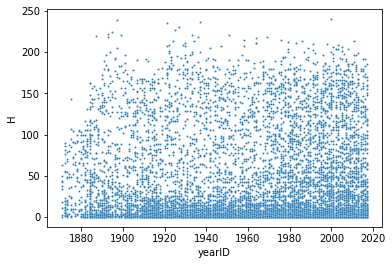

In [17]:
sns.scatterplot(x='yearID', y='H', data=playerHits.sample(frac=0.1), s=4)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


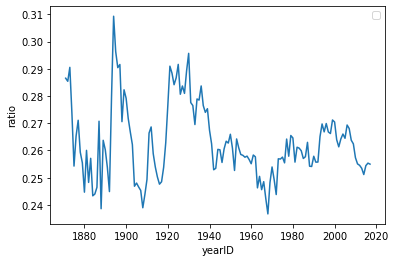

In [31]:
batting = playerHits.groupby('yearID').agg({'H':'mean', 'AB':'mean'}).reset_index()
batting['Hm3'] = batting.H*3
batting['ratio'] = batting.H/batting.AB
# sns.lineplot('yearID', 'Hm3', data=batting)
# sns.lineplot('yearID', 'AB', data=batting)
# batting

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(1910.0, 1950.0)

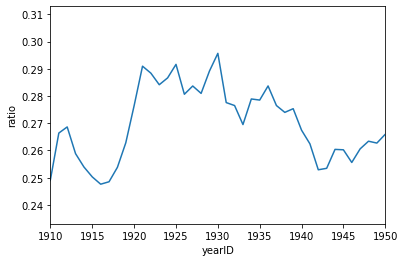

In [37]:
sns.lineplot('yearID', 'ratio', data=batting)
plt.ylim([0, .31])
plt.xlim(1910, 1950)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


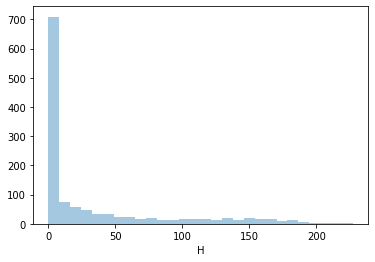

In [46]:
playerHits1996 = playerHits[playerHits.yearID == 1996].copy()
playerHits1996.head()
# playerHits1996 = playerHits1996[playerHits1996.AB > 5]
sns.distplot(playerHits1996.H, kde=False)

In [47]:
playerHits1996['avg'] = playerHits1996.H / playerHits1996.AB
playerHits1996.sort_values('avg', ascending=False)

,playerID,nameFirst,nameLast,AB,H,HR,yearID,avg
17239,clemero02,Roger,Clemens,1,1,0,1996,1.0
38226,hancory01,Ryan,Hancock,1,1,0,1996,1.0
7913,blaziro01,Ron,Blazier,1,1,0,1996,1.0
8846,borbope02,Pedro,Borbon,1,1,0,1996,1.0
41259,hernali01,Livan,Hernandez,1,1,0,1996,1.0
...,...,...,...,...,...,...,...,...
102202,wittbo01,Bobby,Witt,0,0,0,1996,NaN
102302,wojcist01,Steve,Wojciechowski,0,0,0,1996,NaN
102312,wolcobo01,Bob,Wolcott,0,0,0,1996,NaN
102814,worreto01,Todd,Worrell,0,0,0,1996,NaN
